## 필요 라이브러리 설치

In [ ]:
!pip install konlpy
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

## konlpy와 NLTK를 이용해서 모델링

### 데이터 전처리

In [ ]:
from konlpy.tag import Okt
import os
import json
import pandas as pd
import tensorflow as tf
import numpy as np

In [ ]:
okt = Okt()

### konlpy 라이브러리의 Okt모듈을 이용해서 형태소 분리

In [ ]:
def tokenize(doc):
    # norm은 정규화, stem은 근어로 표시하기를 나타냄
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Section4/project/ICON_Reviews.csv", index_col=0)
df.head()

,name,class_id,rate,reviews,label
0,데이비드 시먼,101,2.32,ㅋㅋㅋㅋ이2새2끼 한 10판동안 존2나 어이없게 먹혀서 팔려고 잠금해제했더니 승격까...,1
1,데이비드 시먼,101,2.32,아 장점하나 더 있다. 멀던가능 하프라인까지 던져짐. 훈련코치 먹이면 더 멀리도 가능할듯,1
2,데이비드 시먼,101,2.32,잉국 친선용 콘시먼 후기하... 이형 꽁지머리 간지 유일한 잉글국대 레전드 키퍼로 ...,0
3,데이비드 시먼,101,2.32,개 병신새끼 쳐막는걸 못봤어 위치선정도 안돼 중거리슛 못막아 커브볼 못막아 땅볼볼 ...,0
4,데이비드 시먼,101,2.32,내가 고급여 키퍼를 딱 둘써봄 주공반데사르랑 콘시먼 둘의 특징 딱 한줄로 쓰자면주공...,0


In [ ]:
df.drop(["rate"], axis=1, inplace=True)
df.loc[df["label"] == -1, "label"] = 2
df.head()

,name,class_id,reviews,label
0,데이비드 시먼,101,ㅋㅋㅋㅋ이2새2끼 한 10판동안 존2나 어이없게 먹혀서 팔려고 잠금해제했더니 승격까...,1
1,데이비드 시먼,101,아 장점하나 더 있다. 멀던가능 하프라인까지 던져짐. 훈련코치 먹이면 더 멀리도 가능할듯,1
2,데이비드 시먼,101,잉국 친선용 콘시먼 후기하... 이형 꽁지머리 간지 유일한 잉글국대 레전드 키퍼로 ...,0
3,데이비드 시먼,101,개 병신새끼 쳐막는걸 못봤어 위치선정도 안돼 중거리슛 못막아 커브볼 못막아 땅볼볼 ...,0
4,데이비드 시먼,101,내가 고급여 키퍼를 딱 둘써봄 주공반데사르랑 콘시먼 둘의 특징 딱 한줄로 쓰자면주공...,0


### 데이터셋 분류

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = .2, random_state=42)

### 토큰화 진행

In [ ]:
if os.path.isfile('train_docs.json'):
    with open('train_docs.json') as f:
        train_docs = json.load(f)
    with open('test_docs.json') as f:
        test_docs = json.load(f)
else:
    train_docs = [(tokenize(train.iloc[i][2]), int(train.iloc[i][3])) for i in range(len(train))]
    test_docs = [(tokenize(test.iloc[i][2]), int(test.iloc[i][3])) for i in range(len(test))]
    # JSON 파일로 저장
    with open('train_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(train_docs, make_file, ensure_ascii=False, indent="\t")
    with open('test_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(test_docs, make_file, ensure_ascii=False, indent="\t")

In [ ]:
tokens = [t for d in train_docs for t in d[0]]

### NLTK를 이용한 모델링

In [ ]:
import nltk
text = nltk.Text(tokens, name='NMSC')

In [ ]:
text.vocab().most_common(10)

[('./Punctuation', 6070),
 ('하다/Verb', 5825),
 ('좋다/Adjective', 4640),
 ('이/Josa', 4345),
 ('가/Josa', 4309),
 ('에/Josa', 3955),
 ('은/Josa', 3216),
 ('는/Josa', 3077),
 ('쓰다/Verb', 2934),
 ('도/Josa', 2830)]

### 자주 나오는 단어 시각화

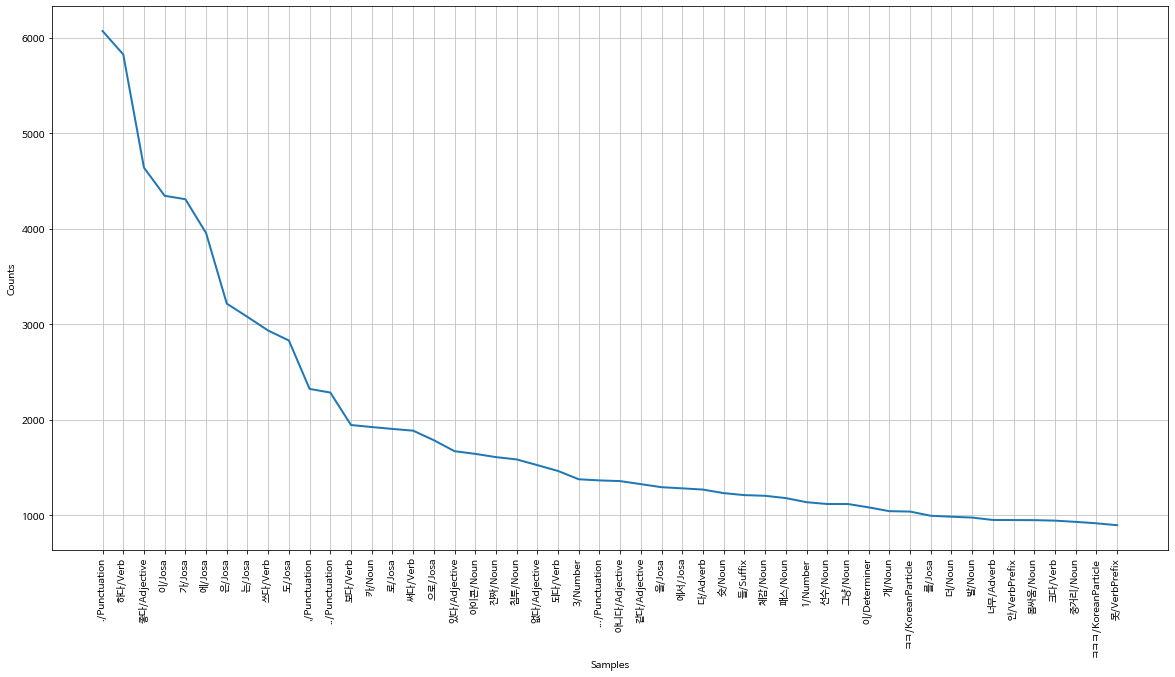

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(20,10))
text.plot(50)

In [ ]:
selected_words = [f[0] for f in text.vocab().most_common(10000)]

def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

X_train = [term_frequency(d) for d, _ in train_docs]
X_test = [term_frequency(d) for d, _ in test_docs]
y_train = [c for _, c in train_docs]
y_test = [c for _, c in test_docs]

In [ ]:
import numpy as np

X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

### 모델 학습

In [ ]:
from tensorflow.keras import models
from tensorflow.keras.layers import Dense


model = models.Sequential([
                           Dense(64, activation='relu', input_shape=(10000,)),
                           Dense(64, activation='relu'),
                           Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size = 512)
results = model.evaluate(X_test, y_test)

Epoch 1/10
26/26 [==============================] - 1s 36ms/step - loss: 0.9991 - accuracy: 0.5836
Epoch 2/10
26/26 [==============================] - 1s 36ms/step - loss: 0.7705 - accuracy: 0.7214
Epoch 3/10
26/26 [==============================] - 1s 35ms/step - loss: 0.5625 - accuracy: 0.7734
Epoch 4/10
26/26 [==============================] - 1s 37ms/step - loss: 0.4168 - accuracy: 0.8415
Epoch 5/10
26/26 [==============================] - 1s 35ms/step - loss: 0.3095 - accuracy: 0.8920
Epoch 6/10
26/26 [==============================] - 1s 35ms/step - loss: 0.2322 - accuracy: 0.9213
Epoch 7/10
26/26 [==============================] - 1s 36ms/step - loss: 0.1733 - accuracy: 0.9457
Epoch 8/10
26/26 [==============================] - 1s 36ms/step - loss: 0.1318 - accuracy: 0.9623
Epoch 9/10
26/26 [==============================] - 1s 35ms/step - loss: 0.1029 - accuracy: 0.9718
Epoch 10/10
101/101 [==============================] - 0s 3ms/step - loss: 1.0632 - accuracy: 0.7278


### 모델 부호화

In [ ]:
import pickle

with open('suggestion_model.pkl','wb') as pickle_file:
      pickle.dump(model, pickle_file)

INFO:tensorflow:Assets written to: ram://473c913f-8059-4c33-a2b5-7c35f0989180/assets
